<div class="alert alert-block alert-success"> 
<h1>Статистика - Домашнее задание 1</h1>
</div>

### Задача 1

Постройте в Python функцию **statistical_analysis**, которая будет проводить анализ выборки. 

**На вход она берет:**

- один ряд в формате «список» или «кортеж».

**И делает следующие шаги:**

1. Проводит проверку на тип данных: если тип данных аргумента не list или tuple, то выводит ошибку «Нужен список или кортеж!»  
2. Проводит проверку на длину ряда: если в нём 4 наблюдения или меньше, то выдает ошибку «Требуется более длинный ряд».
3. Проводит преобразование типа данных «список» в тип данных Series (pandas).
4. Для ряда выводит (с помощью print и расшифровки) среднее, дисперсию, стандартное отклонение.
    
    Также возвращает эти значения в return.
    
5. Для ряда возвращает в return квантильный анализ (все элементы вместе, в рамках одного array): 
    - медиану,
    - все квартили (+ межквартильный размах),
    - децили.
    
    Реализуйте квантильный анализ таким образом, чтобы ряд требуемых квантилей был по умолчанию установлен как q=[0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9] (в качестве аргумента функции **statistical_analysis**), но его можно было бы поменять.
    
    Также сделайте print всей информации по квантилям (максимально user-friendly), чтобы подписывалась отдельно медиана, отдельно — квартили, отдельно — все децили, отдельно — межквартильный размах.
    
6. Для ряда функция **statistical_analysis** строит гистограмму с помощью библиотеки seaborn.

Найдите на [kaggle.com](http://kaggle.com) датасет и протестируйте вашу функцию на всех признаках, принадлежащих шкале отношений

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # устанавливаю тему Seaborn по умолчанию

In [2]:
# завожу списки - выборку для пример и значения децилей
list_or_tuple_input = [1,3,4,5,7,8,9,8,7,6,5,4,3,2,1]
list_of_quantiles = [0.1,0.25,0.3,0.4,0.5,0.6,0.75,0.9]

In [3]:
def statistical_analysis (list_or_tuple_input, list_of_quantiles):
    
    if type(list_or_tuple_input) not in (list, tuple): # проверяю, что на вход подан список или кортеж
        return 'Нужен список или кортеж!'
    elif len(list_or_tuple_input) <= 4: # проверяю, что количество элементов больше 4
        return 'Требуется более длинный ряд' 
    else:
        series_input = pd.DataFrame(list_or_tuple_input, columns = ['row_elements']) # меняю тип на pandas Series

# базовая статистика

        # считаю среднее, дисперсию, стандартное отклонение    
        mean_value = series_input['row_elements'].mean()
        variance_value = series_input['row_elements'].var()
        st_deviation_value = series_input['row_elements'].std()

        # считаю моду и медиану
        mode_value = st.mode(series_input['row_elements'])
        median_value = st.median(series_input['row_elements'])
        quantile_analysis_array = np.array(median_value) # начинаю наполнять массив NumPy

        # вывожу на печать параметры
        print("Среднее = ", round(mean_value, 2),'\n'
                "Дисперсия = ", round(variance_value, 2),'\n'
                "Стандартное отклонение = ", round(st_deviation_value, 2),'\n'
                'Мода', mode_value)


# квантильный анализ:

        # считаю квартили
        array_of_quartiles  = np.quantile(series_input['row_elements'], [0.25, 0.50, 0.75])
        quantile_analysis_array = np.append(quantile_analysis_array, array_of_quartiles) # наполняю массив


        # считаю межквартильный размах
        interquartile_range = abs(array_of_quartiles[0] - array_of_quartiles[2])
        quantile_analysis_array = np.append(quantile_analysis_array, interquartile_range) # наполняю массив


        # считаю децили
        array_of_deciles = np.quantile(series_input['row_elements'], list_of_quantiles)
        quantile_analysis_array = np.append(quantile_analysis_array, array_of_deciles) # наполняю массив


        # формирую список подписей
        list_of_column_names = ['Медиана', '1 квартиль', '2 квартиль', '3 квартиль', 'Межквартильный размах']
        l2 = list(map(str,list_of_quantiles)) # список децилей
        l3 = ['дециль ' + direction for direction in l2] # добавляю к значениям децилей наименование
        list_of_column_names.extend(list(map(str,l3))) # добавляю новые названия в список подписей


        # перевожу array numpy в dataframe pandas
        quantile_analysis_df = pd.DataFrame(quantile_analysis_array, index = list_of_column_names )

        
# вывожу гистограмму и датафрейм
        sns.histplot(series_input['row_elements'], kde=True) # функция построения распределения
        plt.title('Распределение элементов')
        plt.rcParams["figure.figsize"] = (12, 6)
        plt.vlines(median_value, # отрисуем линию медианы
                   ymin = 0, 
                   ymax = series_input['row_elements'].value_counts().max(), 
                   linestyles= '--', 
                   colors = 'red',
                   label = 'Медиана')
        plt.vlines(np.quantile(series_input['row_elements'], [0.25, 0.75]), # отрисуем квартили
                   ymin = 0, 
                   ymax = series_input['row_elements'].value_counts().max(), 
                   linestyles= '--', 
                   colors = 'orange', 
                   label = 'Q1, Q3 -квартили')
        plt.legend()
        plt.show()    
    
    
        print (quantile_analysis_df)

        
# возвращаю требуемые значения из функции   
        return (mean_value, variance_value, st_deviation_value, quantile_analysis_array)     

Среднее =  4.87 
Дисперсия =  6.7 
Стандартное отклонение =  2.59 
Мода 1


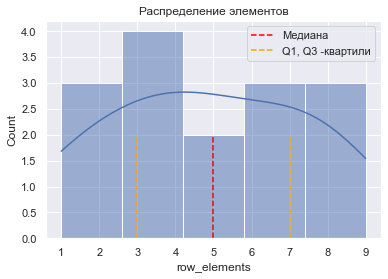

                         0
Медиана                5.0
1 квартиль             3.0
2 квартиль             5.0
3 квартиль             7.0
Межквартильный размах  4.0
дециль 0.1             1.4
дециль 0.25            3.0
дециль 0.3             3.2
дециль 0.4             4.0
дециль 0.5             5.0
дециль 0.6             5.4
дециль 0.75            7.0
дециль 0.9             8.0


(4.866666666666666,
 6.695238095238095,
 2.587515815456612,
 array([5. , 3. , 5. , 7. , 4. , 1.4, 3. , 3.2, 4. , 5. , 5.4, 7. , 8. ]))

In [4]:
statistical_analysis(list_or_tuple_input, list_of_quantiles )

<div class="alert alert-block alert-info">
    </div>

### Загружаю [датасет](https://www.kaggle.com/nickdoulos/greeces-earthquakes)

In [5]:
# загружаю один столбец с магнитудой
earthquakes_data = pd.read_csv('Earthquakes.csv', usecols = ['MAGNITUDE'])
earthquakes_data.describe( )

,MAGNITUDE
count,251263.000000
mean,2.179961
std,0.823466
min,0.000000
25%,1.500000
50%,2.000000
75%,2.900000
max,6.700000


In [6]:
# преобразую в список
earthquakes_data = earthquakes_data.values.tolist()

Среднее =  2.18 
Дисперсия =  0.68 
Стандартное отклонение =  0.82 
Мода 1.6


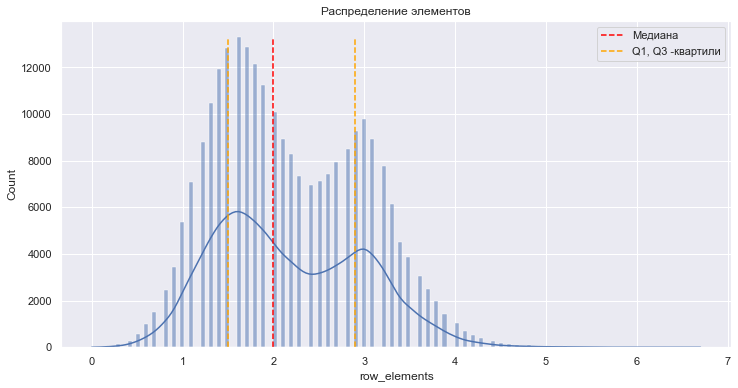

                         0
Медиана                2.0
1 квартиль             1.5
2 квартиль             2.0
3 квартиль             2.9
Межквартильный размах  1.4
дециль 0.1             1.2
дециль 0.25            1.5
дециль 0.3             1.6
дециль 0.4             1.8
дециль 0.5             2.0
дециль 0.6             2.4
дециль 0.75            2.9
дециль 0.9             3.3


(2.1799612358365548,
 0.6780969857059046,
 0.8234664447965713,
 array([2. , 1.5, 2. , 2.9, 1.4, 1.2, 1.5, 1.6, 1.8, 2. , 2.4, 2.9, 3.3]))

In [7]:
statistical_analysis(earthquakes_data, list_of_quantiles )